# Prioritized Replay Deep Q Network

In [1]:
# autoreload code changes
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import json
import numpy as np
import os
import shutil

In [3]:
from matplotlib import pyplot as plt

In [4]:
from banana_env import BananaEnv
from joe_agents.dqn_agent import DqnAgent

## Create Environment to Train In

In [5]:
# create the environment
exe = "../../deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe"
evn_config = {"executable": exe, "train_mode": True}
env = BananaEnv(evn_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Evaluate all Experiments

In [6]:
exp_folder = "experiments"

In [17]:
def plot_results(bank, exp_name):
    params, training_scores, epsilons, buffer_stats, avg_score = bank[exp_name]
    print(f"\nExperiment {exp_name}:")
    print("Params:")
    for p in params.items():
        print(f"\t{p[0]}:\t{p[1]}")
    print("Average Score:", avg_score)
    
    print("Training Scores:")
    plt.plot(training_scores)
    plt.show()
    print("Training Epsilons:")
    plt.plot(epsilons)
    plt.show()

In [8]:
avg_scores = {}
bank = {}
for exp in os.listdir(exp_folder):
    wkspc_folder = os.path.join(exp_folder, exp)
    param_file = os.path.join(wkspc_folder, "params.json")
    scores_file = os.path.join(wkspc_folder, "scores.json")
    epsilons_file = os.path.join(wkspc_folder, "epsilons.json")
    buffer_stats_file = os.path.join(wkspc_folder, "buffer_stats.json")
    if not (os.path.exists(param_file) and os.path.exists(scores_file)):
        continue
    with open(param_file, 'r') as f:
        params = json.load(f)
    with open(scores_file, 'r') as f:
        training_scores = json.load(f)
    with open(epsilons_file, 'r') as f:
        epsilons = json.load(f)
    with open(buffer_stats_file, 'r') as f:
        buffer_stats = json.load(f)
    
    # run for 100 episodes and evaluate how many get more than 13
    agent = DqnAgent(37, 4, params)
    agent.load(os.path.join(wkspc_folder, "checkpoint.pth"))
    scores = []
    for _ in range(100):
        state = env.reset()
        score = 0
        done = False
        while not done:
            action = agent.act(state)
            state, reward, done, _ = env.step(action)
            score += reward
        scores.append(score)
        
    avg_score = np.mean(scores)
    avg_scores[exp] = avg_score
    
    bank[exp] = (params, training_scores, epsilons, buffer_stats, avg_score)

In [9]:
env.close()

## Compare Models

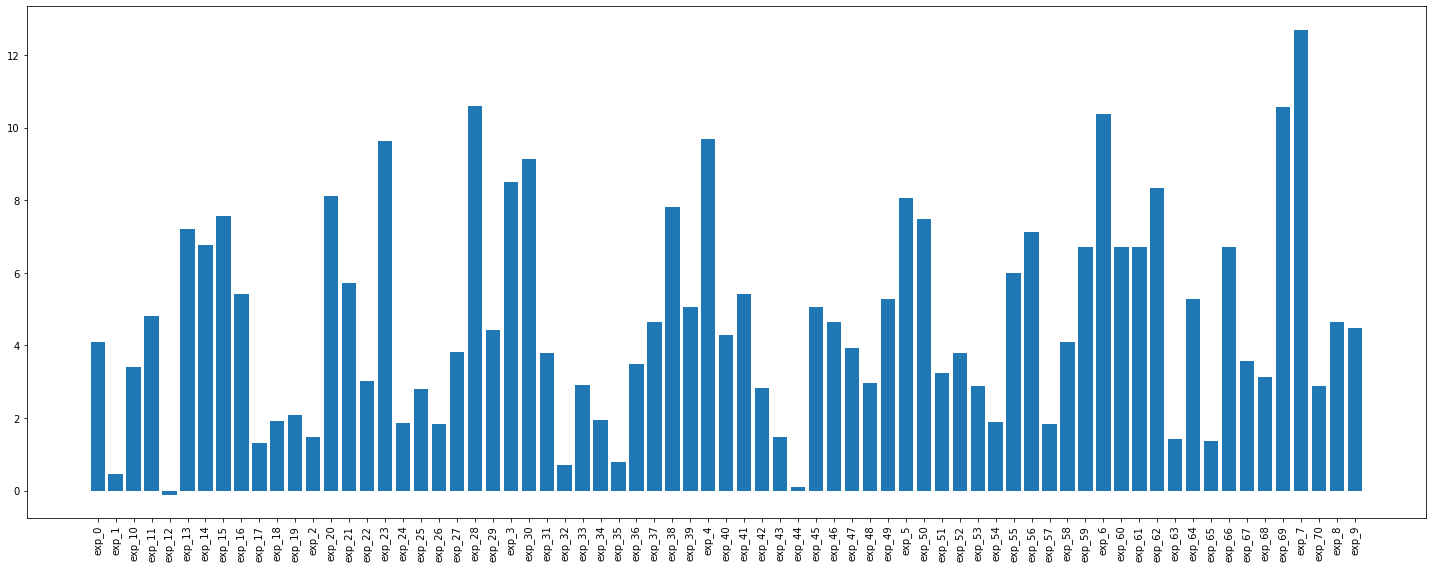

In [13]:
avg_scores_plt = avg_scores.items()
plt.figure(figsize=(20,8))
plt.bar([a[0] for a in avg_scores_plt], [a[1] for a in avg_scores_plt])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Inspect the Best Agent


Experiment exp_7:
Params:
	episodes:	1000
	batch_size:	64
	buffer_size:	10000
	learning_rate:	0.0005
	discount_rate:	0.9
	update_rate:	4
	epsilon_decay:	0.9
	epsilon_decay_rate:	1
	min_epsilon:	0.01
	replay:	prioritized
	prioritized_replay_damp:	0.6
	e_constant:	1e-06
	prioritized_replay_beta_anneal_rate:	100
	learning_start:	64
	double_dqn:	True
	deuling_dqn:	True
Average Score: 12.7
Training Scores:


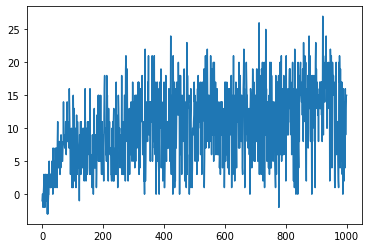

Training Epsilons:


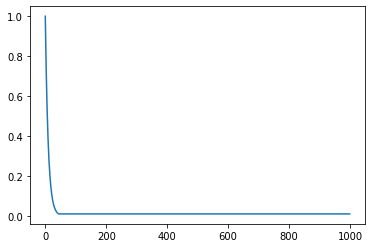

In [18]:
best_agent = "exp_7"
plot_results(bank, best_agent)

## Inspect a Runner Up


Experiment exp_69:
Params:
	episodes:	1000
	batch_size:	64
	buffer_size:	10000
	learning_rate:	0.0005
	discount_rate:	0.9
	update_rate:	10
	epsilon_decay:	0.995
	epsilon_decay_rate:	1
	min_epsilon:	0.01
	replay:	prioritized
	prioritized_replay_damp:	0.6
	e_constant:	1e-06
	prioritized_replay_beta_anneal_rate:	100
	learning_start:	64
	double_dqn:	False
	deuling_dqn:	True
Average Score: 10.58
Training Scores:


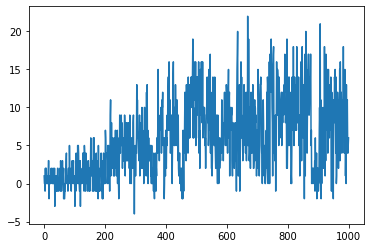

Training Epsilons:


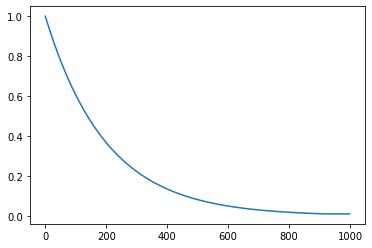

In [20]:
runner_up_agent = "exp_69"
plot_results(bank, runner_up_agent)

## Inspect the Worst Agent


Experiment exp_12:
Params:
	episodes:	1000
	batch_size:	64
	buffer_size:	10000
	learning_rate:	0.0005
	discount_rate:	0.9
	update_rate:	4
	epsilon_decay:	0.9
	epsilon_decay_rate:	1
	min_epsilon:	0.1
	replay:	prioritized
	prioritized_replay_damp:	0.6
	e_constant:	1e-06
	prioritized_replay_beta_anneal_rate:	100
	learning_start:	64
	double_dqn:	False
	deuling_dqn:	False
Average Score: -0.11
Training Scores:


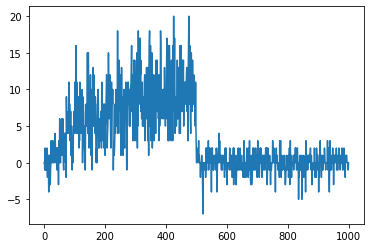

Training Epsilons:


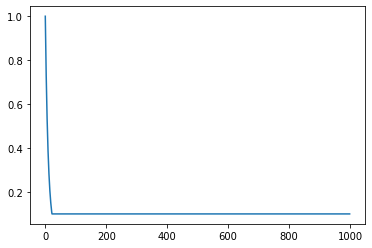

In [19]:
worst_agent = "exp_12"
plot_results(bank, worst_agent)